<a href="https://colab.research.google.com/github/tainakerriou/MachineLearning/blob/main/LabAssignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Credits:* Exercises 1 through 5 are based on notebooks written by [A. Géron](https://colab.research.google.com/github/ageron/handson-ml2/) for his "Hands-on ML" book. Code realeased under [Apache 2.0 license](https://github.com/ageron/handson-ml2/blob/master/LICENSE).

In [19]:
import numpy as np 
import scipy as sp
import pandas as pd 
import matplotlib.pyplot as plt
import skimage.io
import seaborn as sns
import plotly.express as px

from IPython.display import display, HTML

import os
import urllib

## Exercise 1: Color quantization

In this exercise we'll user k-means to reduce the number of colors in an image. We'll work with the following example image:

In [20]:
# Download the ladybug image
images_path = "./images"
os.makedirs(images_path, exist_ok=True)
url = "https://github.com/ageron/handson-ml2/raw/master/images/unsupervised_learning/ladybug.png"
filename = url.split('/')[-1]
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/ladybug.png', <http.client.HTTPMessage at 0x7fa08491c340>)

In [21]:
image = skimage.io.imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

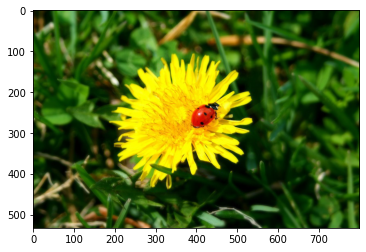

In [22]:
plt.imshow(image)

Our goal is to represent this same image using a reduced pallete of colors.
To do so, we want to find K colors that should summarize all the others. Try this procedure for K = {10,8,6,4,2} colors.
  1. Apply K-means to the image pixels. The centroids of each cluster will correspond to the color of that cluster
  2. Create a copy of the image mapping all its pixel values to that of their corresponding cluster centroid
  3. Display the new color-reduced images. Which pallete size looks best?

## Exercise 2**: Clustering as a preprocessing step for classification

In this exercise, you are going to use clustering to improve the classification performance of logistic regression model on a digits dataset similar to MNIST.

In [23]:
from sklearn.datasets import load_digits

In [24]:
X_digits, y_digits = load_digits(return_X_y=True)

(-0.5, 7.5, 7.5, -0.5)

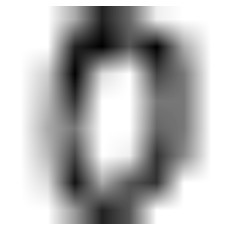

In [25]:
sample_id=0
plt.imshow(X_digits[sample_id].reshape([8,8]), cmap='binary', interpolation='bilinear')
plt.axis('off')

1797

  1. Split this dataset into a training and a test set.
  2. Fit a logistic regression model and evaluate it on the test set. This should give you a baseline accuracy of about 96-97%
  3. Now we'll use clustering as a preprocessing step by including it in a `Pipeline`. Create a `Pipeline` (e.g. using `make_pipeline`) chaining K-means then Logistic Regression. Start trying out 50 clusters for K-means
  4. Evaluate you pipeline on the test set. Did you get a better score than before? By how much?
  5. We did choose the number of clusters in a completely arbitrary fashion. Use a hyperparameter search method (e.g. `GridSearchCV`) to test some other values for `n_clusters`.
  6. Compare your results before and after hyperparameters tuning. Could you improve the model?

In [36]:

from sklearn.model_selection import train_test_split

X_digits_train, X_digits_test, y_digits_train,y_digits_test= train_test_split(X_digits, y_digits, test_size=0.20, train_size=0.80, random_state=None, shuffle=True, stratify=None)




## Exercise 3**: Using clustering for semi-supervised learning

When we have little labeled samples but lots of unlabeled ones, clustering can help us profit from the information the unlabeled samples can gives us.
To demonstrate this idea, well re-use the previous digits dataset, but restrict ourselves to using only a handful of labels:


In [ ]:
n_labeled = 50
X_train_labeled, y_train_labeled = X_train[:n_labeled], y_train[:n_labeled]

### Use clustering to find representative samples
Now its up to you:
1. Train a logistic regression model on the reduced labeled training set. How lower is the accuracy compared to the previous experiment?
2. Now let's use all the samples to train a K-means clustering model. Start using 50 clusters. 
3. K-means will have found us 50 centroids that don't correspond directly to dataset images. We'll take the closest image to each centroid to represent that cluster. To do so, compute distances between images in the training set and the centroids found by k-means. *Tip*: You can use the method [`transform(X)`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans.transform) from your trained k-means estimator to give you distances between all samples in `X` and the cluster centers.
4. Plot the 50 representative images and label them "manually" (since we have the true labels here, you can take the labels from the y_train array).
5. By now you have created a new pool of 50 labeled samples, but carefully chosen (via clustering) to represent well the samples in the full unlabeled dataset. Train a new logistic regression on these 50 representative samples. Does your performance get any better?



### Propagate labels within the clusters
Up to this point we've used clustering to select a handful of representative samples that, once labeled, could represent the full data much better than random samples, thus improving classification results. 
We'll now go a step further and label the remaining unlabeled samples by propagating the labels of the cluster centroids:

1. Create a new label array for all the training samples by giving them the same label of their cluster centroid.
2. Train a logistic regression model on this new set of labeled samples. Could you improve its accuracy any further? It is probabily not the same as having a fully labeled dataset, but it is lileky better than using only 50 labeled samples!
3. Label propagation helps the most when the propagated labels are accurate. Since we have the true labels for this samples, check the accuracy of the propagated labels array. It being accurate explains the accuracy improvement observed just before.



## Exercise 4: k-means on Olivetti faces dataset
The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. 

1. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). 
Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.

2. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in the k-means tutorial). 

3. Visualize the clusters: do you see similar faces in each cluster?

## Exercise 5: GMM on Olivetti faces dataset

1. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). 
2. Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). 
3. Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

## Exercise 6: Mall customer segmentation
Download the following dataset about mall customers, then try to segment these customers into a few groups corresponding to typical spending profiles.

In [ ]:
!wget "https://github.com/SteffiPeTaffy/machineLearningAZ/raw/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"


1. Check which features look most relevant to segmenting this customer base into groups. You can use the seaborn `pairplot` function to visualize all features plotted against each other.
2. Apply k-means clustering and hierarchical clustering to the features you selected in the previous step. 
Do both methods find similar groups? 
3. What are the main characteristics of the clusters found by each method? Try to visualize the clusters with respect to age, income and spending score.




*Note*: To plot a dendrogram for hierarchical clustering, you will need to build a linkage matrix and then call scipy's `sp.cluster.hierarchy.dendrogram` function on it. Check the documentation for more details on how to customize your plot.

Here is a function that builds the linkage matrix given an `AgglomerativeClustering` model (adapted from [scikit-learn's documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)).

In [ ]:
def create_linkage_matrix(model):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    return linkage_matrix